---
# Datasaurus

En el siguiente dataset, haremos un análisis forense de este misterioso set de datos para descubrir insights, utilizando técnicas de análisis exploratorio.

In [1]:
import pandas as pd

In [2]:
# Un archivo .tsv (Tab-Separated Values) es un archivo de texto plano donde las columnas se separan con tabulaciones (\t).
from pathlib import Path

data_path = Path("DatasaurusDozen.tsv")
if not data_path.exists():
    # Ruta alternativa para entornos donde el archivo fue montado automáticamente (por ejemplo, en esta sesión).
    data_path = Path("/mnt/data/DatasaurusDozen.tsv")

df = pd.read_csv(data_path, sep="\t")


In [3]:
df.head(2)

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256


### Análisis Exploratorio Inicial

Realice un análisis exploratorio inicial en donde pueda determinar:

- Estructura del dataframe
- Cantidad de datos
- Valores nulos
- Valores duplicados
- Outlaiers

In [4]:
# 1) Estructura del dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  1846 non-null   object 
 1   x        1846 non-null   float64
 2   y        1846 non-null   float64
dtypes: float64(2), object(1)
memory usage: 43.4+ KB


In [5]:
# 2) Cantidad de datos
print("Filas, Columnas:", df.shape)
print("Datasets distintos:", df['dataset'].nunique())
print("Observaciones por dataset (primeros 5):")
df['dataset'].value_counts().head()


Filas, Columnas: (1846, 3)
Datasets distintos: 13
Observaciones por dataset (primeros 5):


,count
dataset,
dino,142
away,142
h_lines,142
v_lines,142
x_shape,142


In [6]:
# 3) Valores nulos
nulls = df.isna().sum().to_frame("n_nulls")
nulls["pct_nulls"] = (nulls["n_nulls"] / len(df)).round(4)
nulls


,n_nulls,pct_nulls
dataset,0,0.0
x,0,0.0
y,0,0.0


In [7]:
# 4) Valores duplicados y outliers (regla IQR)
dup_total = df.duplicated().sum()
print("Filas duplicadas (todas las columnas):", dup_total)

def iqr_outliers_count(s: pd.Series) -> int:
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lo = q1 - 1.5 * iqr
    hi = q3 + 1.5 * iqr
    return int(((s < lo) | (s > hi)).sum())

outliers = (
    df.groupby("dataset")[["x", "y"]]
      .agg(out_x=("x", iqr_outliers_count), out_y=("y", iqr_outliers_count))
      .reset_index()
)

print("Outliers por dataset (IQR):")
outliers.sort_values(["out_x", "out_y"], ascending=False).head(10)


Filas duplicadas (todas las columnas): 0
Outliers por dataset (IQR):


,dataset,out_x,out_y
3,dino,1,0
0,away,0,0
1,bullseye,0,0
2,circle,0,0
4,dots,0,0
5,h_lines,0,0
6,high_lines,0,0
7,slant_down,0,0
8,slant_up,0,0
9,star,0,0


### Análisis Exploratorio de Datos

In [8]:
# En el set de datos vienen distintas clases de datasets,
# estas se encuentran en la columna "dataset"
# una forma sencilla de conocer los distintos valores que vienen,
# es la siguiente

df['dataset'].unique()


array(['dino', 'away', 'h_lines', 'v_lines', 'x_shape', 'star',
       'high_lines', 'dots', 'circle', 'bullseye', 'slant_up',
       'slant_down', 'wide_lines'], dtype=object)

In [9]:
# En este primer análisis, trabajaremos con el dataset slant_down
df_slant = df[df['dataset']=='slant_down']

In [10]:
df_slant.shape

(142, 3)

### Análisis Dataset slant_down

Realice los siguientes cálculos:
* media de x
* media de y
* desviación estándar de x
* desviación estándar de y
* correlación de xy

In [11]:
# Resumen estadístico básico para x e y
import numpy as np

def summarize_xy(d: pd.DataFrame) -> pd.Series:
    return pd.Series({
        "n": len(d),
        "mean_x": d["x"].mean(),
        "mean_y": d["y"].mean(),
        "std_x": d["x"].std(ddof=1),
        "std_y": d["y"].std(ddof=1),
        "corr_xy": d["x"].corr(d["y"]),
    })

summarize_xy(df_slant)


,0
n,142.000000
mean_x,54.267849
mean_y,47.835896
std_x,16.766759
std_y,26.936105
corr_xy,-0.068980


In [12]:
# Distribución (cuartiles) para x e y
df_slant[["x", "y"]].describe().T


,count,mean,std,min,25%,50%,75%,max
x,142.0,54.267849,16.766759,18.109472,42.890931,53.135159,64.469989,95.593416
y,142.0,47.835896,26.936105,0.303872,27.840858,46.401314,68.439430,99.644179


In [13]:
# Regresión lineal simple (y ~ x) para complementar el análisis
slope, intercept = np.polyfit(df_slant["x"], df_slant["y"], deg=1)
print(f"y = {slope:.4f}*x + {intercept:.4f}")


y = -0.1108*x + 53.8497


### Análisis Dataset dino

Repita el mismo análisis con el dataset dino

In [14]:
# Dataset dino
df_dino = df[df["dataset"] == "dino"]
df_dino.shape


(142, 3)

In [15]:
summarize_xy(df_dino)


,0
n,142.000000
mean_x,54.263273
mean_y,47.832253
std_x,16.765142
std_y,26.935403
corr_xy,-0.064472


In [16]:
df_dino[["x", "y"]].describe().T

slope, intercept = np.polyfit(df_dino["x"], df_dino["y"], deg=1)
print(f"y = {slope:.4f}*x + {intercept:.4f}")


y = -0.1036*x + 53.4530


### Análisis Dataset star

Repita el mismo análisis con el dataset star

In [17]:
# Dataset star
df_star = df[df["dataset"] == "star"]
df_star.shape


(142, 3)

In [18]:
summarize_xy(df_star)


,0
n,142.000000
mean_x,54.267341
mean_y,47.839545
std_x,16.768959
std_y,26.930275
corr_xy,-0.062961


In [19]:
df_star[["x", "y"]].describe().T

slope, intercept = np.polyfit(df_star["x"], df_star["y"], deg=1)
print(f"y = {slope:.4f}*x + {intercept:.4f}")


y = -0.1011*x + 53.3267


### Análisis y Conclusiones

Aparentemente, este misterioso set de datos esconde algunos misterios... ¿Se podrá concluir que cada dataset contiene los mismos datos, o al menos son datos muy similares?

In [ ]:
# Respuesta (análisis y conclusiones)
"""
A simple vista, los tres datasets (slant_down, dino y star) parecen muy diferentes cuando uno los imagina o los grafica,
pero sus estadísticas resumen (media, desviación estándar y correlación entre x e y) tienden a ser muy similares.

Esto sugiere que:
- Las métricas agregadas pueden ocultar patrones estructurales importantes.
- Para validar si “son los mismos datos”, se requiere comparar estadísticas por dataset y, sobre todo, visualizar.

En las siguientes celdas se extiende el análisis para corroborar/refutar esta hipótesis a nivel de los 12 datasets.
"""


Considere extender el análisis exploratorio para corroborar o refutar la aseveración anterior

In [20]:
# Tabla comparativa de estadísticas para TODOS los datasets
summary = df.groupby("dataset").apply(summarize_xy).reset_index()
summary


/tmp/ipython-input-1185005441.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary = df.groupby("dataset").apply(summarize_xy).reset_index()


,dataset,n,mean_x,mean_y,std_x,std_y,corr_xy
0,away,142.0,54.266100,47.834721,16.769825,26.939743,-0.064128
1,bullseye,142.0,54.268730,47.830823,16.769239,26.935727,-0.068586
2,circle,142.0,54.267320,47.837717,16.760013,26.930036,-0.068343
3,dino,142.0,54.263273,47.832253,16.765142,26.935403,-0.064472
4,dots,142.0,54.260303,47.839829,16.767735,26.930192,-0.060341
5,h_lines,142.0,54.261442,47.830252,16.765898,26.939876,-0.061715
6,high_lines,142.0,54.268805,47.835450,16.766704,26.939998,-0.068504
7,slant_down,142.0,54.267849,47.835896,16.766759,26.936105,-0.068980
8,slant_up,142.0,54.265882,47.831496,16.768853,26.938608,-0.068609
9,star,142.0,54.267341,47.839545,16.768959,26.930275,-0.062961


In [21]:
# ¿Qué tan parecidas son estas métricas entre datasets?
metrics = ["mean_x", "mean_y", "std_x", "std_y", "corr_xy"]
summary_stats = summary[metrics].agg(["min", "max", "std"]).T
summary_stats


,min,max,std
mean_x,54.260150,54.269927,0.003320
mean_y,47.830252,47.839829,0.003534
std_x,16.760013,16.770000,0.002828
std_y,26.930002,26.939998,0.004016
corr_xy,-0.069446,-0.060341,0.003055


In [22]:
# Conteo de valores únicos (redondeando para evitar diferencias numéricas marginales)
rounded = summary[metrics].round(6)
unique_counts = rounded.nunique().to_frame("n_unique_rounded_6dp")
unique_counts


,n_unique_rounded_6dp
mean_x,13
mean_y,13
std_x,13
std_y,13
corr_xy,13


In [23]:
# Distancia (en el espacio de métricas) respecto del primer dataset, para evidenciar similitud global
base = rounded.iloc[0]
dist = np.sqrt(((rounded - base) ** 2).sum(axis=1))
pd.DataFrame({"dataset": summary["dataset"], "dist_to_first": dist}).sort_values("dist_to_first", ascending=False)


,dataset,dist_to_first
2,circle,0.014790
4,dots,0.013024
12,x_shape,0.012545
9,star,0.010797
5,h_lines,0.007933
1,bullseye,0.007646
3,dino,0.007414
10,v_lines,0.007234
7,slant_down,0.007115
6,high_lines,0.006067


Realice un análisis visual de los datasets anteriores

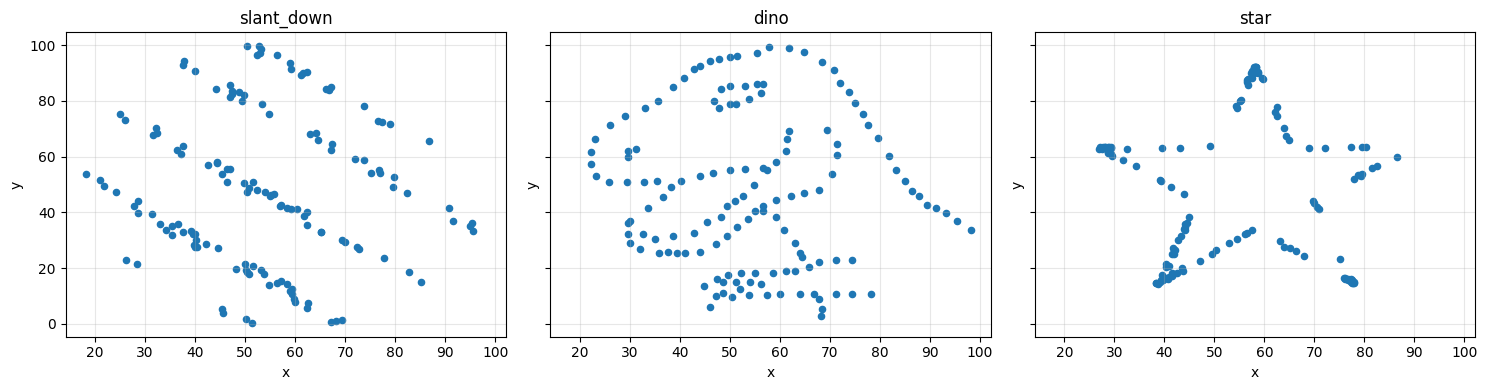

In [24]:
# Visualización comparativa: slant_down, dino y star
import matplotlib.pyplot as plt

to_plot = [
    ("slant_down", df_slant),
    ("dino", df_dino),
    ("star", df_star),
]

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)
for ax, (name, dsub) in zip(axes, to_plot):
    ax.scatter(dsub["x"], dsub["y"], s=20)
    ax.set_title(name)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


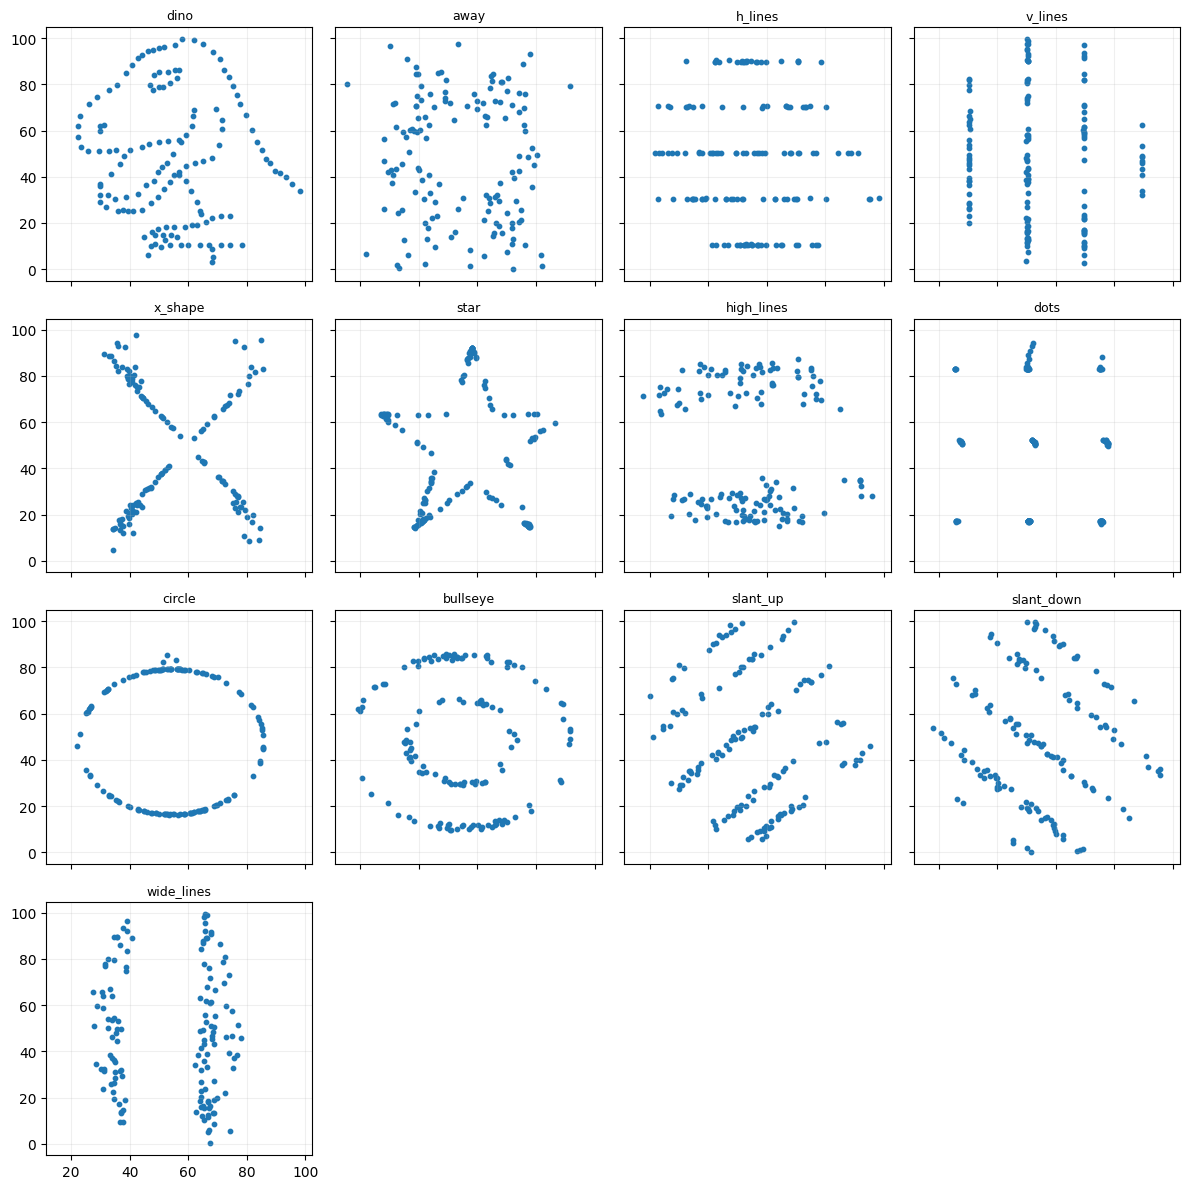

In [25]:
# Visualización de todos los datasets (mismo rango de ejes para comparar patrones)
import math

names = df["dataset"].unique()
n = len(names)

n_cols = 4
n_rows = math.ceil(n / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows), sharex=True, sharey=True)
axes = np.array(axes).ravel()

for ax, name in zip(axes, names):
    dsub = df[df["dataset"] == name]
    ax.scatter(dsub["x"], dsub["y"], s=10)
    ax.set_title(name, fontsize=9)
    ax.grid(True, alpha=0.2)

# Si sobran ejes (cuando n no es múltiplo de n_cols), los apagamos.
for ax in axes[len(names):]:
    ax.axis("off")

plt.tight_layout()
plt.show()


In [26]:
# (Opcional) Superponer la recta de regresión para cada dataset, para notar similitud en tendencia lineal
def fit_line_params(dsub: pd.DataFrame) -> tuple[float, float]:
    m, b = np.polyfit(dsub["x"], dsub["y"], deg=1)
    return float(m), float(b)

lines = []
for name in names:
    dsub = df[df["dataset"] == name]
    m, b = fit_line_params(dsub)
    lines.append({"dataset": name, "slope": m, "intercept": b})

lines_df = pd.DataFrame(lines)
lines_df.sort_values("slope")


,dataset,slope,intercept
3,v_lines,-0.111551,53.890843
11,slant_down,-0.110817,53.849708
10,slant_up,-0.110218,53.812596
9,bullseye,-0.110167,53.809471
6,high_lines,-0.110070,53.808793
8,circle,-0.109814,53.797045
12,wide_lines,-0.106941,53.634949
4,x_shape,-0.105317,53.554226
0,dino,-0.103583,53.452978
1,away,-0.103018,53.425130


In [27]:
# Comparar variación de pendiente/intercepto entre datasets
lines_df[["slope", "intercept"]].agg(["min", "max", "std"]).T


,min,max,std
slope,-0.111551,-0.096913,0.004912
intercept,53.098342,53.890843,0.266193


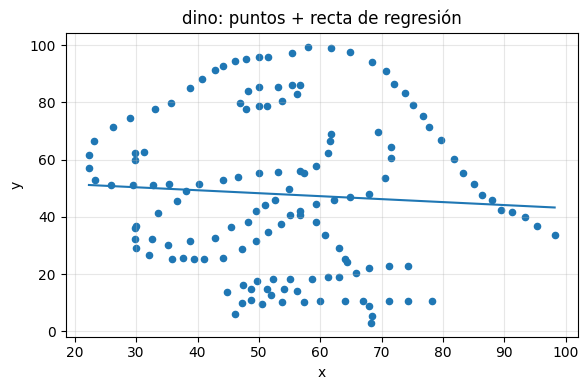

In [28]:
# Ejemplo: un dataset con la misma tendencia lineal puede tener una forma totalmente distinta.
# Graficamos 'dino' con su recta de regresión.
m, b = fit_line_params(df_dino)

x_grid = np.linspace(df_dino["x"].min(), df_dino["x"].max(), 100)
y_grid = m * x_grid + b

plt.figure(figsize=(6, 4))
plt.scatter(df_dino["x"], df_dino["y"], s=20)
plt.plot(x_grid, y_grid)  # sin especificar color (usa el ciclo por defecto)
plt.title("dino: puntos + recta de regresión")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


¿Qué hallazgos ha encontrado que sean relevantes?

In [ ]:
# Responda acá
"""
Hallazgos relevantes (resumen):
1) Las estadísticas agregadas (medias, desviaciones estándar y correlación) son extremadamente parecidas entre los datasets.
2) A pesar de lo anterior, los gráficos muestran patrones geométricos muy diferentes (formas, agrupaciones, curvas, etc.).
3) Conclusión práctica: nunca basta con “describe()” o con métricas resumen; la visualización (y el análisis por segmentos)
   es necesaria para entender la estructura real de los datos.

Esto ilustra por qué, en análisis exploratorio, se recomienda combinar:
- Perfilamiento (nulos, duplicados, rangos)
- Estadísticas resumen
- Visualizaciones
"""
